In [1]:
!pip install pyreadstat


In [2]:
import pandas as pd
import pyreadstat

#Load SAS data 
student_df, _ = pyreadstat.read_sas7bdat("PISAdata/CY08MSP_STU_QQQ.SAS7BDAT")

# Filter Switzerland (CHE)
swiss_students = student_df[student_df['CNT'] == 'CHE']

# Compute averages 
swiss_students['avg_math'] = swiss_students[[f'PV{i}MATH' for i in range(1, 5)]].mean(axis=1)
swiss_students['avg_read'] = swiss_students[[f'PV{i}READ' for i in range(1, 5)]].mean(axis=1)
swiss_students['avg_science'] = swiss_students[[f'PV{i}SCIE' for i in range(1, 5)]].mean(axis=1)

# Export to CSV 
swiss_students[['CNT', 'avg_math', 'avg_read', 'avg_science']].to_csv("swiss_pisa_2022.csv", index=False)

# Preview averages
print("Switzerland 2022 average PISA scores:")
print(swiss_students[['avg_math', 'avg_read', 'avg_science']].mean())


Switzerland 2022 average PISA scores:
avg_math       506.409646
avg_read       481.295119
avg_science    500.922112
dtype: float64


/var/folders/8s/wg5_lw0x0_gg6c7n1yk7l1v40000gn/T/ipykernel_1167/2088785814.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiss_students['avg_math'] = swiss_students[[f'PV{i}MATH' for i in range(1, 5)]].mean(axis=1)
/var/folders/8s/wg5_lw0x0_gg6c7n1yk7l1v40000gn/T/ipykernel_1167/2088785814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiss_students['avg_read'] = swiss_students[[f'PV{i}READ' for i in range(1, 5)]].mean(axis=1)
/var/folders/8s/wg5_lw0x0_gg6c7n1yk7l1v40000gn/T/ipykernel_1167/2088

In [3]:
df_2018, _ = pyreadstat.read_sas7bdat("PISAdata/cy07_msu_stu_qqq.SAS7BDAT")  


df_2018 = df_2018[df_2018['CNT'] == 'CHE']


df_2018['avg_math'] = df_2018[[f'PV{i}MATH' for i in range(1, 5)]].mean(axis=1)
df_2018['avg_read'] = df_2018[[f'PV{i}READ' for i in range(1, 5)]].mean(axis=1)
df_2018['avg_science'] = df_2018[[f'PV{i}SCIE' for i in range(1, 5)]].mean(axis=1)


df_2018[['CNT', 'avg_math', 'avg_read', 'avg_science']].to_csv("swiss_pisa_2018.csv", index=False)


print("Switzerland 2018 average PISA scores:")
print(df_2018[['avg_math', 'avg_read', 'avg_science']].mean().round(2))


Switzerland 2018 average PISA scores:
avg_math       515.92
avg_read       484.28
avg_science    494.71
dtype: float64


In [4]:

# Define fixed-width columns (0-indexed)
colspecs = [
    (0, 3),        # CHE = Switzerland
    (1149, 1158),  # PV1MATH
    (1158, 1167),  
    (1167, 1176),  
    (1176, 1185),  
    (1185, 1194),  
    (1509, 1518),  # PV1READ
    (1518, 1527),  
    (1527, 1536),  
    (1536, 1545),  
    (1545, 1554),  
    (1554, 1563),  # PV1SCIE
    (1563, 1572),  
    (1572, 1581),  
    (1581, 1590),  
    (1590, 1599),  
]

# Column names
colnames = [
    "CNT",
    "PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH",
    "PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ",
    "PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE"
]

# Read the fixed-width file
df = pd.read_fwf("PISAdata/INT_STU12_DEC03.txt", colspecs=colspecs, names=colnames)

# Filter for Switzerland
df = df[df['CNT'] == 'CHE']

# Compute averages
df['avg_math'] = df[[f'PV{i}MATH' for i in range(1,5)]].mean(axis=1)
df['avg_read'] = df[[f'PV{i}READ' for i in range(1,5)]].mean(axis=1)
df['avg_science'] = df[[f'PV{i}SCIE' for i in range(1,5)]].mean(axis=1)

# Compute national means
mean_math = df['avg_math'].mean()
mean_read = df['avg_read'].mean()
mean_science = df['avg_science'].mean()

df[['CNT', 'avg_math', 'avg_read', 'avg_science']].to_csv("swiss_pisa_2012.csv", index=False)


print("Switzerland PISA 2012 Averages:")
print(f"Math:    {mean_math:.2f}")
print(f"Reading: {mean_read:.2f}")
print(f"Science: {mean_science:.2f}")


Switzerland PISA 2012 Averages:
Math:    520.92
Reading: 497.81
Science: 503.64


In [5]:
column_specs_2003 = [
    (3, 6),       # CNT
    (1000, 1008), # PV1MATH
    (1009, 1017), # PV2MATH
    (1018, 1026), # PV1READ
    (1027, 1035), # PV2READ
    (1036, 1044), # PV1SCIE
    (1045, 1053), # PV2SCIE
]
column_names = [
    'CNT',
    'PV1MATH', 'PV2MATH',
    'PV1READ', 'PV2READ',
    'PV1SCIE', 'PV2SCIE',
]


file_path_2003 = "PISAdata/2003_student.txt"
df_2003 = pd.read_fwf(file_path_2003, colspecs=column_specs_2003, names=column_names, encoding='latin1')


df_2003 = df_2003[df_2003['CNT'] == 'CHE']


for col in column_names[1:]:
    df_2003[col] = pd.to_numeric(df_2003[col], errors='coerce')


df_2003['avg_math'] = df_2003[['PV1MATH', 'PV2MATH']].mean(axis=1)
df_2003['avg_read'] = df_2003[['PV1READ', 'PV2READ']].mean(axis=1)
df_2003['avg_science'] = df_2003[['PV1SCIE', 'PV2SCIE']].mean(axis=1)


df_2003[['CNT', 'avg_math', 'avg_read', 'avg_science']].to_csv("swiss_pisa_2003.csv", index=False)


print("Switzerland PISA 2003 Scores:")
print(df_2003[['avg_math', 'avg_read', 'avg_science']].mean())

Switzerland PISA 2003 Scores:
avg_math       497.419413
avg_read       502.772407
avg_science    502.916714
dtype: float64


In [6]:



column_specs_2006 = [
    (15, 18),      # CNT
    (656, 665),    # PV1MATH
    (665, 674),    # PV2MATH
    (674, 683),    # PV3MATH
    (683, 692),    # PV4MATH
    (692, 701),    # PV5MATH
    (701, 710),    # PV1READ
    (710, 719),    # PV2READ
    (719, 728),    # PV3READ
    (728, 737),    # PV4READ
    (737, 746),    # PV5READ
    (746, 755),    # PV1SCIE
    (755, 764),    # PV2SCIE
    (764, 773),    # PV3SCIE
    (773, 782),    # PV4SCIE
    (782, 791),    # PV5SCIE
]

column_names = [
    'CNT',
    'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
    'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
    'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',
]


file_path_2006 = "PISAdata/student_2006.txt"
df_2006 = pd.read_fwf(file_path_2006, colspecs=column_specs_2006, names=column_names, encoding='latin1')


df_2006 = df_2006[df_2006['CNT'] == 'CHE']


for col in column_names[1:]:
    df_2006[col] = pd.to_numeric(df_2006[col], errors='coerce')


df_2006['avg_math'] = df_2006[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
df_2006['avg_read'] = df_2006[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
df_2006['avg_science'] = df_2006[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].mean(axis=1)


df_2006[['CNT', 'avg_math', 'avg_read', 'avg_science']].to_csv("swiss_pisa_2006.csv", index=False)


print("Switzerland PISA 2006 Scores:")
print(df_2006[['avg_math', 'avg_read', 'avg_science']].mean())


Switzerland PISA 2006 Scores:
avg_math       528.288094
avg_read       496.601398
avg_science    508.017499
dtype: float64


In [7]:

column_specs_2009 = [
    (0, 3),      
    (744, 752), (752, 760), (760, 768), (768, 776), (776, 784),  
    (784, 792), (792, 800), (800, 808), (808, 816), (816, 824),  
    (824, 832), (832, 840), (840, 848), (848, 856), (856, 864), 
]
column_names_2009 = [
    "CNT",
    "PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH",
    "PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ",
    "PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE"
]


file_path_2009 = "PISAdata/student_2009.txt"
df_2009 = pd.read_fwf(file_path_2009, colspecs=column_specs_2009, names=column_names_2009)


df_2009 = df_2009[df_2009["CNT"] == "CHE"]


for col in column_names_2009[1:]:
    df_2009[col] = pd.to_numeric(df_2009[col], errors='coerce')


df_2009["avg_math"] = df_2009[["PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH"]].mean(axis=1)
df_2009["avg_read"] = df_2009[["PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ"]].mean(axis=1)
df_2009["avg_science"] = df_2009[["PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE"]].mean(axis=1)


df_2009[["CNT", "avg_math", "avg_read", "avg_science"]].to_csv("swiss_pisa_2009.csv", index=False)


print("Switzerland PISA 2009 Scores:")
print(df_2009[["avg_math", "avg_read", "avg_science"]].mean())


Switzerland PISA 2009 Scores:
avg_math       529.471300
avg_read       495.004137
avg_science    508.741455
dtype: float64


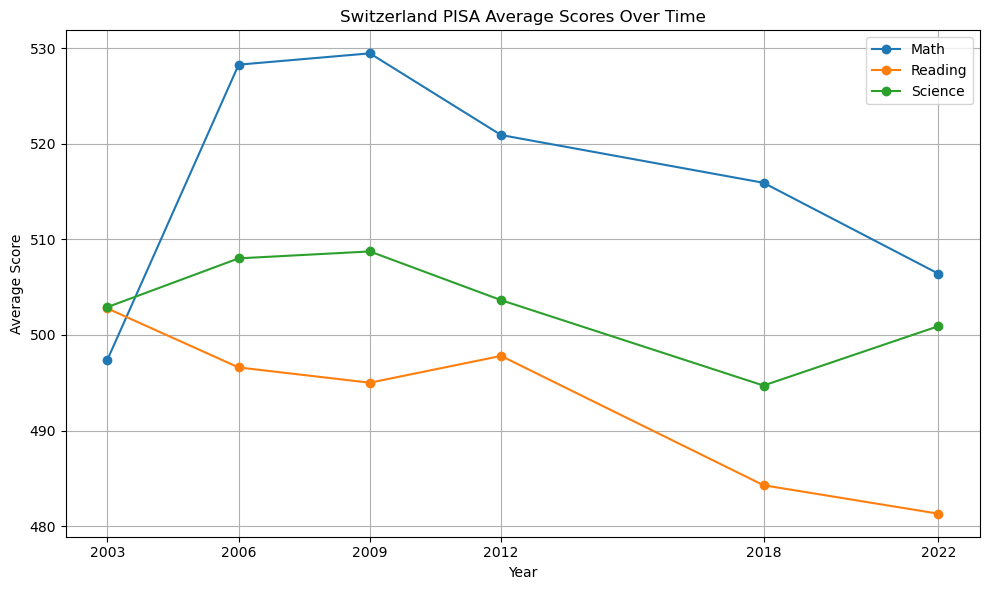

In [8]:

import matplotlib.pyplot as plt


years = [2003, 2006, 2009, 2012, 2018, 2022]
data_frames = []

for year in years:
    df = pd.read_csv(f"swiss_pisa_{year}.csv")
    df['Year'] = year
    data_frames.append(df)


combined_df = pd.concat(data_frames)


summary_df = combined_df.groupby('Year')[['avg_math', 'avg_read', 'avg_science']].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(summary_df['Year'], summary_df['avg_math'], marker='o', label='Math')
plt.plot(summary_df['Year'], summary_df['avg_read'], marker='o', label='Reading')
plt.plot(summary_df['Year'], summary_df['avg_science'], marker='o', label='Science')

plt.title('Switzerland PISA Average Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd


years = [2003, 2006, 2009, 2012, 2018, 2022]


data_frames = []
for year in years:
    df = pd.read_csv(f"swiss_pisa_{year}.csv")
    df['Year'] = year
    data_frames.append(df)


combined_df = pd.concat(data_frames, ignore_index=True)


summary_df = combined_df.groupby('Year')[['avg_math', 'avg_read', 'avg_science']].mean().reset_index()


summary_df.to_csv("swiss_pisa_summary.csv", index=False)

